In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from collections import OrderedDict

## Finding a Random Number

In [2]:
U = st.uniform.rvs()
def h(x):
    return -(x**2) + U

In [3]:
T = 100000
xy = {}
for t in range(T):
    u = st.norm.rvs()
    xy[u] = h(u)
xy = OrderedDict(sorted(xy.items()))
round(max(xy.values()),5), round(U,5)

(0.35781, 0.35781)

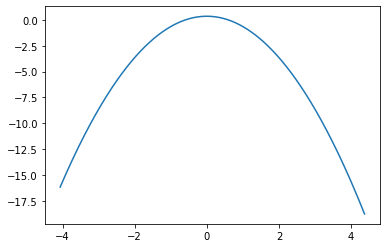

In [4]:
plt.plot(list(xy.keys()),list(xy.values()))

## Strange Domain Sampling

In [37]:
T = 10**6
J = 0
a = 0.5
X = []
Y = []
cols = []
for t in range(T):
    x,y = st.multivariate_normal.rvs(cov = [[1,a],[a,1]])
    X.append(x)
    Y.append(y)
    if (x**2)*(1 + np.sin(3*y)*np.cos(8*x)) + (y**2)*(2 + np.cos(5*x) * np.cos(8*y)) <= 1:
        J += 1
        cols.append(1)
    else:
        cols.append(0)
J / T

0.349652

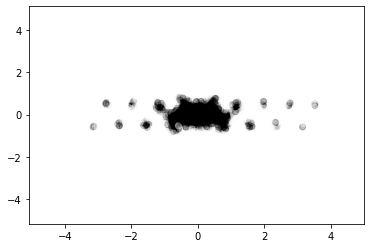

In [38]:
plt.scatter(X,Y,c=cols,cmap='binary',alpha=0.25)
plt.show()

## Ex. 5.8

In [44]:
def h(x):
    return (np.cos(50*x) + np.sin(20*x))**2

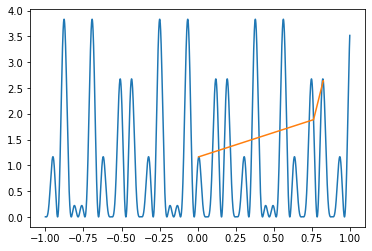

2.633967015232918

In [401]:
x = [np.random.uniform()]
temp = 1
scale = 1
hval=[h(x[0])]
hcur=h(x[0])
diff=1
i=0
while diff>10**(-4):
    temp = temp / (1+i)**2
    prop = x[i] + np.random.uniform()*scale
    #print(i,"initial", prop, temp, scale)
    if (prop > 1 or prop < 0 or np.log(np.random.uniform()*temp) > (h(prop) - hcur)):
        prop = x[i]
    #print(i, "updated",prop)
    x.append(prop)
    hcur = h(prop)
    hval.append(hcur)
    if (i>10 and len(np.unique(x[int(i/2):i]))>1):
        diff=max(hval)-max(hval[1:int(i/2)])
    i+=1
    scale = scale*5*np.sqrt(temp)
x2 = [i / 10000 for i in range(-10000,10000)]
y = [h(i) for i in x2]
plt.plot(x2,y)
plt.plot(x,hval)
plt.show()
hval[-1]